In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import root_scalar

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Critical Mach number
---------------------------------
- Prandtl Glauert correction
$$
c_p = \frac{c_{p,\text{min}}}{\sqrt{1 - M^2}}
$$

- Using isentropic relation
$$
c_{p,cr} = \frac{2}{\gamma M^2}
\left (
\left (
\frac{1+[(\gamma-1)/2]M^2}{1+(\gamma-1)/2}
\right )^{\gamma/(\gamma-1)} - 1
\right )
$$

In [2]:
def cp_prandtl_glauert(M, cp_min):
    return -cp_min / np.sqrt(1-M**2)

In [3]:
def cp_critical_mach(M, gamma=1.4):
    return 2/gamma/M**2*(((1+(gamma-1)/2*M**2)/(1+(gamma-1)/2))**(gamma/(gamma-1)) -1)

- Graphical approach
    * $cp_\text{,min}=0.43$

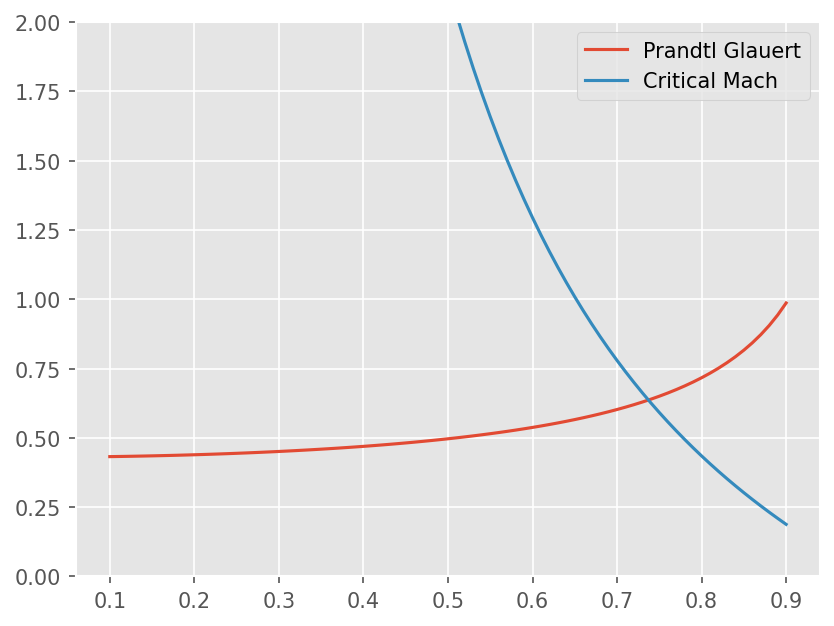

In [4]:
Ms = np.linspace(0.1, 0.9, 81)

cp_pg = cp_prandtl_glauert(Ms, 0.43)
cp_cr = cp_critical_mach(Ms)

plt.plot(Ms, -cp_pg)
plt.plot(Ms, -cp_cr)
plt.ylim(0, 2)
plt.legend(['Prandtl Glauert', 'Critical Mach'])

- Numerical approach
    * Root finding

In [5]:
f = lambda x: cp_prandtl_glauert(x, 0.43) - cp_critical_mach(x)
root_scalar(f, bracket=[0.1, 0.9])

      converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 0.7371059142269233
         method: brentq